Здравствуйте, уважаемые слушатели!
Ко всем темам раздела «Чистка и предобработка данных» один ноутбук Colab. Забирайте себе этот блокнот.

# **Описание кейса**

![](https://img.freepik.com/free-vector/gamers-using-different-devices-and-playing-on-mobile-phone-tablet-laptop-console-cartoon-illustration_74855-14380.jpg?size=626&ext=jpg&ga=GA1.2.1798082654.1667295738&semt=sph)
<font color="grey" size="1"><a href="https://ru.freepik.com/free-vector/gamers-using-different-devices-and-playing-on-mobile-phone-tablet-laptop-console-cartoon-illustration_12699087.htm#query=gamers-using-different-devices&position=0&from_view=search&track=sph">Изображение от pch.vector</a> на Freepik</font>

> Маркетинговый отдел компании, занимающейся развитием киберспорта, планирует запустить таргетированную рекламу среди пользователей Вконтакте. В связи с этим им необходимо изучить целевую аудиторию и составить портреты пользователей, увлекающихся киберспортом, в том числе в разрезе онлайн-игр. Нашему коллеге-маркетологу необходимо построить дашборд с анализом выборки пользователей из онлайн-магазина, расположенного на платформе Вконтакте. Специалист по сбору данных представил датасет с выгруженной информацией по профилям в формате csv. Однако данные в нем в том виде, в котором они есть, не подходят для построения дашборда.

**Наша задача** — очистить данные и привести их в нужный формат.

Какая **информация важна** для нашего коллеги-маркетолога:
1. id пользователя
2. возраст (кол-во лет)
3. пол (1: женский, 2: мужской, 0: не указан)
3. город проживания (если указан)
4. страна проживания (если указана)
5. количество подписчиков (если указано)
6. дата последнего входа в магазин
7. сумма трат в магазине (значение обязательно должно быть указано, пользователей с неуказанным значением необходимо исключить; значения должны быть соизмеримы, т.е. указаны в единой валюте)
8. наименования игр, которыми интересуется пользователь (значение обязательно должно быть указано, пользователей с неуказанным значением необходимо исключить)

**Формат файла** с результатами: *xlsx* или *csv*

# **Тема 3**

## Библиотека pandas (тема 3)

[Официальная документация библиотеки pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)


Объект DataFrame состоит из так называемых объектов Series. Обязательно наличие индексного столбца (index)
![](https://miro.medium.com/max/1400/0*YwPNRwWwTfra-IzR)

DataFrame представляет собой прямоугольную таблицу значений:
*   каждая строка - **пример**, или же **sample**,
*   каждая колонка - **признак**, или же **feature**.

Индекс примера   | Признак_1 | Признак_2 | Признак_3 | Признак_4 | Признак_5
-----------------|-----------|-----------|-----------|-----------|-----------
 1               | 10        | 20        | "строка 1"| True      | 3.1415926    
 2               | 15        | 10        | "строка 2"| False     | 2.71      
 3               | 12        | 40        | "строка 3"| False     | -1.12345  


Также, таблицы часто называют датасетами, а строки - наблюдениями или записями.

**Типы данных**, используемые в pandas:
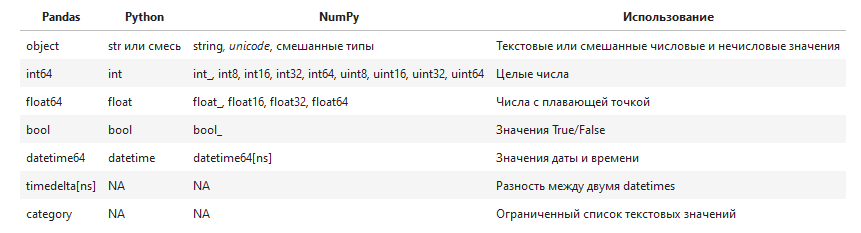

## Импорт библиотек (тема 3)

In [1]:
# из библиотеки google.colab импортируем класс files при необходимости подгрузки файла с персонального компьютера
from google.colab import files
# импортируем pandas - основную библиотеку аналитика данных
import pandas as pd
# импортируем библиотеку numpy для возможных расчетов
import numpy as np
# импортируем модуль json для распаковки структур данных формата json
import json

## Подгрузка файла (тема 3)

**1 способ:** подгрузка файла в среду выполнения кода с google диска

https://drive.google.com/file/d/1hAKgiAlDGzH8njfKRKs-mj_XQLHfYb-c/view?usp=share_link

In [2]:
!gdown --id 1hAKgiAlDGzH8njfKRKs-mj_XQLHfYb-c

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hAKgiAlDGzH8njfKRKs-mj_XQLHfYb-c
To: /content/shop_users.csv
100% 750k/750k [00:00<00:00, 105MB/s]


**2 способ:** подгрузка файла в среду выполнения кода с персонального компьютера

In [ ]:
uploaded = files.upload()

Saving shop_users.csv to shop_users (1).csv


## Чтение файла (тема 3)

1. Файлы формата csv, tsv

In [ ]:
df = pd.read_csv('shop_users.csv')

Параметр *sep* не указываем, т.к. по умолчанию sep=',' (что соответствует используемому разделителю в нашем файле)

2. Файлы формата xls, xlsx

In [ ]:
# df = pd.read_excel('shop_users.xlsx')

In [ ]:
df

,Unnamed: 0,id,bdate,city,country,last_seen,followers_count,common_count,sex,is_closed,home_town,relation,costs,games
0,0,19,1.1.2005,"{'id': 2, 'title': 'Saint-Petersburg'}","{'id': 1, 'title': 'Россия'}","{'platform': 2, 'time': 1662237362}",39326.0,0,1,0.0,NaN,NaN,"{'costs': 25000, 'currency': 'RUR'}","[{'name': 'Dota 2'}, {'name': 'CS:GO'}, {'name..."
1,1,510,1.1.1985,NaN,"{'id': 1, 'title': 'Россия'}","{'platform': 7, 'time': 1661321803}",19698.0,0,2,0.0,NaN,NaN,"{'costs': 50000, 'currency': 'RUR'}","[{'name': 'League of Legends'}, {'name': 'Valo..."
2,2,674,1.1.1979,"{'id': 99, 'title': 'Новосибирск'}","{'id': 1, 'title': 'Россия'}","{'platform': 7, 'time': 1662202619}",NaN,0,2,1.0,NaN,NaN,"{'costs': 75000, 'currency': 'RUR'}",[{'name': 'Fortnite'}]
3,3,1018,1.1.2002,"{'id': 2, 'title': 'Saint-Petersburg'}","{'id': 1, 'title': 'Россия'}","{'platform': 1, 'time': 1613708136}",NaN,0,2,1.0,NaN,NaN,"{'costs': 100000, 'currency': 'RUR'}","[{'name': 'PUBG'}, {'name': 'Hearthstone'}, {'..."
4,4,1586,1.1.1989,NaN,"{'id': 1, 'title': 'Россия'}","{'platform': 7, 'time': 1619550770}",31433.0,0,2,0.0,NaN,NaN,"{'costs': 100000, 'currency': 'RUR'}",[{'name': 'FIFA'}]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,3520,741237782,22.2.2000,NaN,"{'id': 1, 'title': 'Россия'}","{'platform': 4, 'time': 1661793146}",NaN,0,2,1.0,NaN,NaN,"{'costs': 25000, 'currency': 'RUR'}",[{'name': 'CS:GO'}]
3521,3521,741237783,4.8.2005,"{'id': 1, 'title': 'Россия'}","{'platform': 4, 'time': 1658820057}",NaN,0.0,2,1,NaN,NaN,"{'costs': 50000, 'currency': 'RUR'}",[{'name': 'Fortnite'}],no
3522,3522,741237784,30.11.2002,"{'id': 1, 'title': 'Россия'}","{'platform': 2, 'time': 1662237422}",0,0.0,2,0,NaN,0,"{'costs': 50000, 'currency': 'RUR'}","[{'name': 'PUBG'}, {'name': 'Hearthstone'}, {'...",no
3523,3523,741237785,5.6.2008,"{'id': 1, 'title': 'Россия'}","{'platform': 4, 'time': 1662232523}",1,0.0,2,0,NaN,NaN,"{'costs': 25000, 'currency': 'RUR'}",[{'name': 'FIFA'}],no


## Обзор датасета (тема 3)

In [ ]:
# показывает наблюдения с начала датасета (по умолчанию - 5 наблюдений)
df.head()

,Unnamed: 0,id,bdate,city,country,last_seen,followers_count,common_count,sex,is_closed,home_town,relation,costs,games
0,0,19,1.1.2005,"{'id': 2, 'title': 'Saint-Petersburg'}","{'id': 1, 'title': 'Россия'}","{'platform': 2, 'time': 1662237362}",39326.0,0,1,0.0,NaN,NaN,"{'costs': 25000, 'currency': 'RUR'}","[{'name': 'Dota 2'}, {'name': 'CS:GO'}, {'name..."
1,1,510,1.1.1985,NaN,"{'id': 1, 'title': 'Россия'}","{'platform': 7, 'time': 1661321803}",19698.0,0,2,0.0,NaN,NaN,"{'costs': 50000, 'currency': 'RUR'}","[{'name': 'League of Legends'}, {'name': 'Valo..."
2,2,674,1.1.1979,"{'id': 99, 'title': 'Новосибирск'}","{'id': 1, 'title': 'Россия'}","{'platform': 7, 'time': 1662202619}",NaN,0,2,1.0,NaN,NaN,"{'costs': 75000, 'currency': 'RUR'}",[{'name': 'Fortnite'}]
3,3,1018,1.1.2002,"{'id': 2, 'title': 'Saint-Petersburg'}","{'id': 1, 'title': 'Россия'}","{'platform': 1, 'time': 1613708136}",NaN,0,2,1.0,NaN,NaN,"{'costs': 100000, 'currency': 'RUR'}","[{'name': 'PUBG'}, {'name': 'Hearthstone'}, {'..."
4,4,1586,1.1.1989,NaN,"{'id': 1, 'title': 'Россия'}","{'platform': 7, 'time': 1619550770}",31433.0,0,2,0.0,NaN,NaN,"{'costs': 100000, 'currency': 'RUR'}",[{'name': 'FIFA'}]


In [ ]:
# показывает наблюдения с начала датасета (можно указать нужное количество выводимых строк)
df.head(2)

,Unnamed: 0,id,bdate,city,country,last_seen,followers_count,common_count,sex,is_closed,home_town,relation,costs,games
0,0,19,1.1.2005,"{'id': 2, 'title': 'Saint-Petersburg'}","{'id': 1, 'title': 'Россия'}","{'platform': 2, 'time': 1662237362}",39326.0,0,1,0.0,NaN,NaN,"{'costs': 25000, 'currency': 'RUR'}","[{'name': 'Dota 2'}, {'name': 'CS:GO'}, {'name..."
1,1,510,1.1.1985,NaN,"{'id': 1, 'title': 'Россия'}","{'platform': 7, 'time': 1661321803}",19698.0,0,2,0.0,NaN,NaN,"{'costs': 50000, 'currency': 'RUR'}","[{'name': 'League of Legends'}, {'name': 'Valo..."


In [ ]:
# показывает наблюдения с конца датасета (можно указать нужное количество выводимых строк)
df.tail(3)

,Unnamed: 0,id,bdate,city,country,last_seen,followers_count,common_count,sex,is_closed,home_town,relation,costs,games
3522,3522,741237784,30.11.2002,"{'id': 1, 'title': 'Россия'}","{'platform': 2, 'time': 1662237422}",0,0.0,2,0,NaN,0,"{'costs': 50000, 'currency': 'RUR'}","[{'name': 'PUBG'}, {'name': 'Hearthstone'}, {'...",no
3523,3523,741237785,5.6.2008,"{'id': 1, 'title': 'Россия'}","{'platform': 4, 'time': 1662232523}",1,0.0,2,0,NaN,NaN,"{'costs': 25000, 'currency': 'RUR'}",[{'name': 'FIFA'}],no
3524,3524,741237786,24.7.1990,"{'id': 1, 'title': 'Россия'}","{'platform': 4, 'time': 1661793146}",NaN,0.0,2,1,NaN,NaN,"{'costs': 25000, 'currency': 'RUR'}","[{'name': 'StarCraft 2'}, {'name': 'Warface'},...",no


In [ ]:
# показывает случайно выбранные наблюдения (можно указать нужное количество выводимых строк)
df.sample(4)

,Unnamed: 0,id,bdate,city,country,last_seen,followers_count,common_count,sex,is_closed,home_town,relation,costs,games
3121,3121,58474,1.1.2002,NaN,"{'id': 1, 'title': 'Россия'}","{'platform': 7, 'time': 1662237208}",435.0,0,2,0.0,NaN,0,"{'costs': 25000, 'currency': 'RUR'}","[{'name': 'Dota Underlords'}, {'name': 'Quake ..."
1531,1531,736607018,25.6.2008,NaN,"{'id': 1, 'title': 'Россия'}","{'platform': 4, 'time': 1662190779}",1.0,0,1,0.0,NaN,0,"{'costs': 25000, 'currency': 'RUR'}",[{'name': 'Quake Champions'}]
1572,1572,736019525,10.12.2007,"{'id': 2, 'title': 'санкт-петербург'}","{'id': 1, 'title': 'Россия'}","{'platform': 7, 'time': 1662235671}",1.0,0,2,0.0,NaN,NaN,"{'costs': 25000, 'currency': 'RUR'}",[{'name': 'Heroes of the Storm'}]
3404,3404,741970978,23.6.2000,NaN,"{'id': 1, 'title': 'Россия'}","{'platform': 4, 'time': 1662237400}",4.0,0,2,0.0,NaN,0,"{'costs': 25000, 'currency': 'RUR'}",[{'name': 'Heroes of the Storm'}]


In [ ]:
# тип объекта
type(df)

pandas.core.frame.DataFrame

In [ ]:
type(df['id'])

pandas.core.series.Series

In [ ]:
# размеры датасета (количество ячеек: строки Х столбцы)
df.size

49350

In [ ]:
# длина датасета (количество наблюдений)
len(df)

3525

In [ ]:
# количество признаков в датасете (количество столбцов)
len(df.axes[1])

14

In [ ]:
# размеры датасета (количество наблюдений и признаков)
df.shape

(3525, 14)

In [ ]:
# информация о типах данных
df.dtypes

Unnamed: 0           int64
id                   int64
bdate               object
city                object
country             object
last_seen           object
followers_count    float64
common_count         int64
sex                  int64
is_closed          float64
home_town           object
relation            object
costs               object
games               object
dtype: object

In [ ]:
# информация о датасете:
# количество записей,
# количество столбцов,
# наименование признаков,
# количество заполненных (не пустых) значений по каждому признаку,
# тип данных по каждому признаку,
# объем занимаемой памяти
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3525 non-null   int64  
 1   id               3525 non-null   int64  
 2   bdate            3525 non-null   object 
 3   city             1972 non-null   object 
 4   country          3525 non-null   object 
 5   last_seen        3499 non-null   object 
 6   followers_count  2652 non-null   float64
 7   common_count     3525 non-null   int64  
 8   sex              3525 non-null   int64  
 9   is_closed        3521 non-null   float64
 10  home_town        558 non-null    object 
 11  relation         1584 non-null   object 
 12  costs            3495 non-null   object 
 13  games            3495 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 385.7+ KB


## Выявление проблем (тема 3)

1. Наличие признаков, не представляющих ценности в рамках кейса ('Unnamed: 0', 'common_count', 'is_closed', 'home_town', 'relation')
2. Возможно наличие дубликатов
3. Наличие незаполненных значений ('city', 'last_seen', 'followers_count', 'costs', 'games')
4. Наличие вложенных значений (словарей по признакам 'city', 'country', 'last_seen', 'costs' и списков словарей по признаку 'games')
5. Приведение признаков в необходимый формат (в datetime: 'bdate, 'last_seen', в float: затраты из признака 'costs')
6. Необходимость расчета признака 'age' (от признака 'bdate')
7. Наличие закодированных значений (по признаку 'sex')
8. Возможные другие проблемы, которые могут быть выявлены в процессе предобработки данных

# **Тема 4**

## Исключение признаков, не представляющих ценности в рамках кейса

Перед проведением манипуляций рекомендовано создать копию исходного датасета в отдельную переменную, чтобы в случае необходимости или ошибки при обработке без труда вернуться к исходной версии

In [ ]:
df_copy = df.copy()

In [ ]:
# при использовании выражения:
# df_copy = df
# копия не создастся, а датафрейм просто сохранится также в переменную df_copy,
# и при его изменении при обращении к переменной df_copy он также будет изменен в переменной df.

In [ ]:
# выводит список колонок датафрейма
df_copy.columns

Index(['Unnamed: 0', 'id', 'bdate', 'city', 'country', 'last_seen',
       'followers_count', 'common_count', 'sex', 'is_closed', 'home_town',
       'relation', 'costs', 'games'],
      dtype='object')

In [ ]:
# создание списка "ненужных" колонок
columns = ['Unnamed: 0', 'common_count', 'is_closed', 'home_town', 'relation']

In [ ]:
# параметр inplace=True позволяет автоматически перезаписать текущий датафрейм
# без использования конструкции: df_copy = df_copy.drop(columns=columns)
df_copy.drop(columns=columns, inplace=True)

In [ ]:
# также с помощью drop() можно удалять и сами наблюдения (см. тех. документацию)

In [ ]:
# проверка списка колонок датафрейма
df_copy.columns

Index(['id', 'bdate', 'city', 'country', 'last_seen', 'followers_count', 'sex',
       'costs', 'games'],
      dtype='object')

## Проверка и исключение дубликатов

### Проверка на дубликаты

In [ ]:
# проверка на дубликаты: выдает объект Series с булевыми значениями True/False
df_copy.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3520    False
3521    False
3522    False
3523    False
3524    False
Length: 3525, dtype: bool

In [ ]:
# нас интересует количество дубликатов
# т.к. True = 1, False = 0, то необходимо сложить все значения по данному объекту Series
df_copy.duplicated().sum()

158

In [ ]:
# проверка дубликатов по столбцу id
df_copy.duplicated(subset='id').sum()

158

In [ ]:
# проверка дубликатов по нескольким столбцам
# (например, сколько однополых людей, родившихся в одинаковые дни)
# параметр keep=False присваивает значения True всем найденным дубликатам
# (по умолчанию keep='first', т.е. присваивает значение False первому из совпадений)
df_copy.duplicated(subset=['bdate', 'sex'], keep=False).sum()

1760

### Исключение дубликатов

In [ ]:
# исключение дубликатов по всем признакам датафрейма
df_copy.drop_duplicates(inplace=True)

In [ ]:
# исключение дубликатов по столбцу
# (в нашем случае операция аналогична предыдущей)
# df_copy.drop_duplicates(subset='id', inplace=True)

In [ ]:
# исключение дубликатов по нескольким столбцам
# (в нашем случае нет необходимости)
# параметр keep=False удаляет все найденные дубликаты
# (по умолчанию keep='first', т.е. удаляет все дубликаты, кроме первого)
# df_copy.drop_duplicates(subset=['bdate', 'sex'], keep=False, inplace=True)

In [ ]:
# контроль размеров датафрейма
df_copy.shape

(3367, 9)

In [ ]:
3525-158

3367

# **Тема 5. Проверка данных на пропущенные значения, их обработка или исключение**

**NaN** и **None**:
* **NaN** отвечает за отсутствующее в ячейке число. Его тип данных float, поэтому с NaN можно проводить математические операции.
* **None**
принадлежит к нечисловому типу NoneType, и математические операции
с ним неосуществимы.

Строки с этими значениями **не
всегда стоит удалять**, иногда их наличие несет ценность для анализа, в некоторых случаях пропуски можно восстановить.

## Проверка на пропущенные значения

In [ ]:
# проверка на пропущенные значения: выдает объект DataFrame с булевыми значениями True/False
df_copy.isna()

,id,bdate,city,country,last_seen,followers_count,sex,costs,games
0,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False
4,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3520,False,False,True,False,False,True,False,False,False
3521,False,False,False,False,True,False,False,False,False
3522,False,False,False,False,False,False,False,False,False
3523,False,False,False,False,False,False,False,False,False


In [ ]:
# нас интересует, в первую очередь, количество пропущенных значений
# т.к. True = 1, False = 0, то необходимо сложить все значения по столбцам данного объекта DataFrame
df_copy.isna().sum()

id                    0
bdate                 0
city               1534
country               0
last_seen            26
followers_count     836
sex                   0
costs                29
games                29
dtype: int64

In [ ]:
# isnull() - альтернативный метод проверки на пустые значения
# можно оценить количество пропущенных значений в процентах, применив обычную арифметику
df_copy.isnull().mean()*100

id                  0.000000
bdate               0.000000
city               45.559846
country             0.000000
last_seen           0.772201
followers_count    24.829225
sex                 0.000000
costs               0.861301
games               0.861301
dtype: float64

In [ ]:
# обратные методы: notna() и notnull() - количество заполненных значений
df_copy.notna().sum()

id                 3367
bdate              3367
city               1833
country            3367
last_seen          3341
followers_count    2531
sex                3367
costs              3338
games              3338
dtype: int64

**Обзор пропущенных значений** по признакам:
1. 'city' - пользователи указывают город по желанию (по кейсу нет необходимости в исключении пропущенных значений; восстановить пропуски нет возможности)
2. 'last_seen' - должно быть указано значение последнего входа в магазин (скорее всего, ошибка в базе данных, либо при выгрузке данных в файл; по кейсу не указана необходимость в исключении пропущенных значений)
3. 'followers_count' - по пользователям с закрытым аккаунтом информация не предоставляется (по кейсу нет необходимости в исключении пропущенных значений; восстановить пропуски нет возможности)
4. 'costs' - затраты в магазине (по кейсу требование - исключить пропущенные значения; восстановить пропуски нет возможности)
5. 'games' - списки игр, которыми интересуются пользователи (по кейсу требование - исключить пропущенные значения; восстановить пропуски нет возможности)

## Исключение пропусков

In [ ]:
# необходимо исключить наблюдения с пропусками по признакам 'costs' и 'games'
df_copy.dropna(subset=['costs', 'games'], inplace=True)

In [ ]:
# применение метода dropna() без указания значений параметра subset
# df_copy.dropna(inplace=True)
# приведет к удалению всех наблюдений датасета, где есть хотя бы одно пустое значение

In [ ]:
# контроль размеров датафрейма
df_copy.shape

(3338, 9)

In [ ]:
3367-3338

29

In [ ]:
# контроль пропусков
df_copy.isna().sum()

id                    0
bdate                 0
city               1529
country               0
last_seen            26
followers_count     828
sex                   0
costs                 0
games                 0
dtype: int64

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3338 entries, 0 to 3524
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3338 non-null   int64  
 1   bdate            3338 non-null   object 
 2   city             1809 non-null   object 
 3   country          3338 non-null   object 
 4   last_seen        3312 non-null   object 
 5   followers_count  2510 non-null   float64
 6   sex              3338 non-null   int64  
 7   costs            3338 non-null   object 
 8   games            3338 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 260.8+ KB


In [ ]:
# количество данных изменилось, однако значения индексов остались в диапазоне от 0 до 3520
# следует перезаписать индексы по порядку (в нашем случае нет необходимости сохранять исходные индексы),
# передав параметр drop=True для автоматического удаления исходного индексного столбца
df_copy.reset_index(drop=True, inplace=True)

In [ ]:
# проверка диапазона индексов
df_copy.index

RangeIndex(start=0, stop=3338, step=1)

## Обработка пропусков

In [ ]:
# метод для заполнения пропусков - fillna()
# (в нашем случае нет необходимости)
# df_copy['city'].fillna('Moscow', inplace=True)
# df_copy['followers_count'].fillna(0, inplace=True)

# **Тема 6. Работа с JSON и вложенными структурами данных**

In [ ]:
df_copy.head(3)

,id,bdate,city,country,last_seen,followers_count,sex,costs,games
0,19,1.1.2005,"{'id': 2, 'title': 'Saint-Petersburg'}","{'id': 1, 'title': 'Россия'}","{'platform': 2, 'time': 1662237362}",39326.0,1,"{'costs': 25000, 'currency': 'RUR'}","[{'name': 'Dota 2'}, {'name': 'CS:GO'}, {'name..."
1,510,1.1.1985,NaN,"{'id': 1, 'title': 'Россия'}","{'platform': 7, 'time': 1661321803}",19698.0,2,"{'costs': 50000, 'currency': 'RUR'}","[{'name': 'League of Legends'}, {'name': 'Valo..."
2,674,1.1.1979,"{'id': 99, 'title': 'Новосибирск'}","{'id': 1, 'title': 'Россия'}","{'platform': 7, 'time': 1662202619}",NaN,2,"{'costs': 75000, 'currency': 'RUR'}",[{'name': 'Fortnite'}]


'city', 'country', 'last_seen', 'costs', 'games'

## 'city'

In [ ]:
# обзор значения по признаку
df_copy['city'][0]

"{'id': 2, 'title': 'Saint-Petersburg'}"

In [ ]:
# пробуем достать значение с помощью модуля json
json.loads(df_copy['city'][0])

JSONDecodeError: ignored

In [ ]:
# судя по ошибке не устраивает наличие одинарных кавычек
# пробуем заменить на двойные кавычки с помощью метода replace()
df_copy['city'][0].replace("'", '"')

'{"id": 2, "title": "Saint-Petersburg"}'

In [ ]:
json.loads(df_copy['city'][0].replace("'", '"'))

{'id': 2, 'title': 'Saint-Petersburg'}

In [ ]:
# пробуем достать значение по ключу title
json.loads(df_copy['city'][0].replace("'", '"'))['title']

'Saint-Petersburg'

In [ ]:
# код отработал корректно
# пишем функцию для последующего применения к столбцу, при этом вычленяя наименование города
def text_to_json(text):
  result = json.loads(text.replace("'", '"'))['title']
  return result

In [ ]:
# применяем функцию к столбцу
df_copy['city'] = df_copy['city'].apply(text_to_json)

AttributeError: ignored

In [ ]:
# ошибка, связанная с наличием пропусков по столбцу
# добавим в функцию обработку пустых значений (один из вариантов исполнения)
def text_to_json(text):
  if pd.isna(text):
    result = 'Город не указан'
  else:
    result = json.loads(text.replace("'", '"'))['title']
  return result

In [ ]:
# применяем функцию к столбцу
df_copy['city'] = df_copy['city'].apply(text_to_json)

In [ ]:
# контроль результата
df_copy.city

0       Saint-Petersburg
1        Город не указан
2            Новосибирск
3       Saint-Petersburg
4        Город не указан
              ...       
3333     Город не указан
3334              Россия
3335              Россия
3336              Россия
3337              Россия
Name: city, Length: 3338, dtype: object

In [ ]:
# данные записались корректно,
# однако стоит отметить, что они не приведены к единому регистру, языку,
# например, различное написание русских городов на разных языках: Saint-Petersburg и Новосибирск,
# а также наличие названия страны "Россия" в последних наблюдениях.
# откорректируем данные несоответствия в одной из следующих тем

## 'country'

In [ ]:
df_copy['country'][0]

"{'id': 1, 'title': 'Россия'}"

In [ ]:
# альтернативный метод: приведение значений в словарь с помощью функции eval()
eval(df_copy['country'][0])

{'id': 1, 'title': 'Россия'}

In [ ]:
eval(df_copy['country'][0])['title']

'Россия'

In [ ]:
# применим функцию к столбцу
# т.к. по столбцу нет пропусков, то попробуем применить
# анонимную lambda-функцию для записи наименования страны
df_copy['country'] = df_copy['country'].apply(lambda x: eval(x)['title'])

KeyError: ignored

In [ ]:
# ошибка, связанная с тем, что по каким-то наблюдениям в словаре нет ключа 'title',
# но по данному признаку может быть только два ключа - 'id' и 'title'
# ищем проблемные значения с помощью конструкции обработки исключений try-except
for item in df_copy.country:
  try:
    eval(item)['title']
  except:
    print(item)

{'platform': 4, 'time': 1658820057}
{'platform': 2, 'time': 1662237422}
{'platform': 4, 'time': 1662232523}
{'platform': 4, 'time': 1661793146}


In [ ]:
# несоответствия по данному признаку, относящиеся к другому - 'last_seen'
# посмотрим на эти наблюдения по всем признакам с помощью метода contains()
# (str. производит принудительный перевод в строковое значение)
df_copy[df_copy.country.str.contains('platform')]

,id,bdate,city,country,last_seen,followers_count,sex,costs,games
3334,741237783,4.8.2005,Россия,"{'platform': 4, 'time': 1658820057}",NaN,0.0,1,[{'name': 'Fortnite'}],no
3335,741237784,30.11.2002,Россия,"{'platform': 2, 'time': 1662237422}",0,0.0,0,"[{'name': 'PUBG'}, {'name': 'Hearthstone'}, {'...",no
3336,741237785,5.6.2008,Россия,"{'platform': 4, 'time': 1662232523}",1,0.0,0,[{'name': 'FIFA'}],no
3337,741237786,24.7.1990,Россия,"{'platform': 4, 'time': 1661793146}",NaN,0.0,1,"[{'name': 'StarCraft 2'}, {'name': 'Warface'},...",no


In [ ]:
# видно, что значения сдвинулись по признакам
# скорее всего, в какой-то момент произошла ошибка при записи данных
# можно было бы попытаться восстановить значения, отдав их обратно специалисту по сбору данных,
# однако таких значений всего 4 из общего числа наблюдений,
# поэтому в данном случаем можно их исключить из датасета,
# но проинформировать причастных об ошибке все же стоит

df_copy.drop([3334, 3335, 3336, 3337],inplace=True)

In [ ]:
# снова применим функцию к столбцу
df_copy['country'] = df_copy['country'].apply(lambda x: eval(x)['title'])

In [ ]:
# контроль результата
df_copy.country

0       Россия
1       Россия
2       Россия
3       Россия
4       Россия
         ...  
3329    Россия
3330    Россия
3331    Россия
3332    Россия
3333    Россия
Name: country, Length: 3334, dtype: object

In [ ]:
# данные записались корректно,
# однако стоит также проверить их на корректность значений

## 'last_seen'

In [ ]:
df_copy['last_seen'][0]

"{'platform': 2, 'time': 1662237362}"

In [ ]:
# данные содержат пустые значения
# перепишем функцию, используемую при обработке признака 'city',
# при этом не заменяя пропущенные значения другими
def text_to_json_2(text):
  if pd.isna(text):
    result = np.nan
  else:
    result = json.loads(text.replace("'", '"'))['time']
  return result

In [ ]:
# применяем функцию к столбцу
df_copy['last_seen'] = df_copy['last_seen'].apply(text_to_json_2)

In [ ]:
# контроль результата
df_copy.last_seen

0       1.662237e+09
1       1.661322e+09
2       1.662203e+09
3       1.613708e+09
4       1.619551e+09
            ...     
3329    1.662186e+09
3330    1.658820e+09
3331    1.662237e+09
3332    1.662233e+09
3333    1.661793e+09
Name: last_seen, Length: 3334, dtype: float64

In [ ]:
# данные в формате float64, при этом большой размерности,
# поэтому отображаются неудобно

In [ ]:
# один из способов форматирования
# (число с плавающей точкой отобразим без указания знаков после запятой)
# (пример для перевода числа в проценты с двумя знаками после запятой - .apply("{0:.2%}".format))
# (если необходимо применить форматирование ко всей таблице, то используется метод .applymap())
df_copy.last_seen.apply("{0:.0f}".format)

0       1662237362
1       1661321803
2       1662202619
3       1613708136
4       1619550770
           ...    
3329    1662185768
3330    1658820057
3331    1662237422
3332    1662232523
3333    1661793146
Name: last_seen, Length: 3334, dtype: object

In [ ]:
# на самом деле, время указано в формате Unix time
# приведем данные в формат даты и времени в одной из следующих тем

## 'costs'

In [ ]:
# обработаем данные альтернативным способом - через обработку текста

# необходимо записать данные и о сумме затрат, и о валюте в отдельные столбцы

In [ ]:
# данные не содержат пустые значения,
# поэтому проверку на пропуски можно опустить

In [ ]:
# демонстрация этапов обработки на одном значении
costs = df_copy['costs'][0]
costs

"{'costs': 25000, 'currency': 'RUR'}"

In [ ]:
# удаление лишних символов с помощью метода .replace()
costs_1 = costs.replace("'", "").replace("{", "").replace("}", ""). replace(":", "")
costs_1

'costs 25000, currency RUR'

In [ ]:
# выделение затрат и валюты в отдельные сущности - элементы списка с помощью метода split()
# (в качестве разделителя указываем запятую)
costs_2 = costs_1.split(",")
costs_2

['costs 25000', ' currency RUR']

In [ ]:
# теперь можно работать с каждой сущностью отдельно
# costs - первый элемент списка costs_2[0]
# currency - второй элемент списка costs_2[1]
print(costs_2[0])
print(costs_2[1])

costs 25000
 currency RUR


In [ ]:
# выделим саму цифру затрат также с помощью метода split()
# (в качестве разделителя - пробел, его можно не указывать, т.к. это значение по умолчанию)
# (необходимый элемент списка - с индексом [1])
costs_2[0].split()[1]

'25000'

In [ ]:
# выделим валюту также с помощью метода split()
# (в качестве разделителя - пробел, его можно не указывать, т.к. это значение по умолчанию)
# (необходимый элемент списка - с индексом [1])
costs_2[1].split()[1]

'RUR'

In [ ]:
# часто бывает, что необходимо избавиться от лишних пробелов в начале или в конце строки
# для этой задачи применяется метод strip()
# например, вычленим слово "currency" из примера выше (слева имеется один лишний пробел)
costs_2[1].split()[0].strip()

'currency'

In [ ]:
# объединение кода в функции для каждой сущности
# (следует добавлять в функции проверку на пропуски и их обработку, а также обработку исключений)

def costs_func(costs_currency):
  costs = (costs_currency.replace("'", "").replace("{", "").replace("}", ""). replace(":", "")
                         .split(",")[0]
                         .split()[1]
                         )
  return costs


def currency_func(costs_currency):
  currency = (costs_currency.replace("'", "").replace("{", "").replace("}", ""). replace(":", "")
                         .split(",")[1]
                         .split()[1]
                         )
  return currency

In [ ]:
# проверка работоспособности функций на одном значении
print(df_copy.costs[10])
print(costs_func(df_copy.costs[10]))
print(currency_func(df_copy.costs[10]))

{'costs': 25000, 'currency': 'RUR'}
25000
RUR


In [ ]:
# применим функции ко всему столбцу, при этом создав для каждого признака отдельный столбец
df_copy['costs_sum'] = df_copy['costs'].apply(costs_func)
df_copy['currency'] = df_copy['costs'].apply(currency_func)

In [ ]:
# контроль результата
df_copy[['costs_sum', 'currency']]

,costs_sum,currency
0,25000,RUR
1,50000,RUR
2,75000,RUR
3,100000,RUR
4,100000,RUR
...,...,...
3329,50000,RUR
3330,50000,RUR
3331,50000,RUR
3332,25000,RUR


In [ ]:
# исключим исходный столбец costs
df_copy.drop(columns='costs', inplace=True)

In [ ]:
# переименуем столбец costs_sum в costs
df_copy.rename(columns={'costs_sum': 'costs'}, inplace=True)

In [ ]:
# контроль результата
df_copy.columns

Index(['id', 'bdate', 'city', 'country', 'last_seen', 'followers_count', 'sex',
       'games', 'costs', 'currency'],
      dtype='object')

In [ ]:
# контроль результата
df_copy[['costs', 'currency']]

,costs,currency
0,25000,RUR
1,50000,RUR
2,75000,RUR
3,100000,RUR
4,100000,RUR
...,...,...
3329,50000,RUR
3330,50000,RUR
3331,50000,RUR
3332,25000,RUR


In [ ]:
# данные содержат информацию о валюте,
# поэтому стоит проверить столец 'currency' на наличие разных валют
# и для соизмеримости добавить дополнительный столбец с приведенными к единой валюте значениями
# в одной из следующих тем

## 'games'

In [ ]:
# преобразуем данные столбца games в списки игр
df_copy.games

0       [{'name': 'Dota 2'}, {'name': 'CS:GO'}, {'name...
1       [{'name': 'League of Legends'}, {'name': 'Valo...
2                                  [{'name': 'Fortnite'}]
3       [{'name': 'PUBG'}, {'name': 'Hearthstone'}, {'...
4                                      [{'name': 'FIFA'}]
                              ...                        
3329    [{'name': 'PUBG'}, {'name': 'Hearthstone'}, {'...
3330    [{'name': 'PUBG'}, {'name': 'Hearthstone'}, {'...
3331                                  [{'name': 'CS:GO'}]
3332                                  [{'name': 'CS:GO'}]
3333                                  [{'name': 'CS:GO'}]
Name: games, Length: 3334, dtype: object

In [ ]:
# данные не содержат пустые значения,
# поэтому проверку на пропуски можно опустить

In [ ]:
# демонстрация этапов обработки на одном значении
games = df_copy.games[0]
games

"[{'name': 'Dota 2'}, {'name': 'CS:GO'}, {'name': 'Warcraft III'}]"

In [ ]:
# используем функцию eval(), чтобы преобразовать строковое значение в список
games_1 = eval(games)
games_1

[{'name': 'Dota 2'}, {'name': 'CS:GO'}, {'name': 'Warcraft III'}]

In [ ]:
# необходимо создать список, в который будут записаны наименования игр
# в цикле for необходимо пройтись по элементам списка, достать значения словарей
# и записать их в список с помощью метода append()
res = []
for game in games_1:
  game_clean = game['name']
  res.append(game_clean)

res

['Dota 2', 'CS:GO', 'Warcraft III']

In [ ]:
# объединение кода в функцию
# (следует добавить в функцию проверку на пропуски и их обработку, а также обработку исключений)

def games_func(games):
  res = []
  for game in eval(games):
    game_clean = game['name']
    res.append(game_clean)

  return res

In [ ]:
# проверка работоспособности функций на одном значении
print(df_copy.games[10])
print(games_func(df_copy.games[10]))

[{'name': 'League of Legends'}]
['League of Legends']


In [ ]:
# применим функции ко всему столбцу, при этом создав отдельный столбец
df_copy['games_clean'] = df_copy['games'].apply(games_func)

In [ ]:
# контроль результата
df_copy['games_clean']

0                     [Dota 2, CS:GO, Warcraft III]
1       [League of Legends, Valorant, Apex Legends]
2                                        [Fortnite]
3                    [PUBG, Hearthstone, Overwatch]
4                                            [FIFA]
                           ...                     
3329                 [PUBG, Hearthstone, Overwatch]
3330                 [PUBG, Hearthstone, Overwatch]
3331                                        [CS:GO]
3332                                        [CS:GO]
3333                                        [CS:GO]
Name: games_clean, Length: 3334, dtype: object

In [ ]:
# исключим исходный столбец games
df_copy.drop(columns='games', inplace=True)

In [ ]:
# переименуем столбец games_clean в games
df_copy.rename(columns={'games_clean': 'games'}, inplace=True)

In [ ]:
# контроль результата
df_copy.columns

Index(['id', 'bdate', 'city', 'country', 'last_seen', 'followers_count', 'sex',
       'costs', 'currency', 'games'],
      dtype='object')

In [ ]:
# контроль результата
df_copy['games']

0                     [Dota 2, CS:GO, Warcraft III]
1       [League of Legends, Valorant, Apex Legends]
2                                        [Fortnite]
3                    [PUBG, Hearthstone, Overwatch]
4                                            [FIFA]
                           ...                     
3329                 [PUBG, Hearthstone, Overwatch]
3330                 [PUBG, Hearthstone, Overwatch]
3331                                        [CS:GO]
3332                                        [CS:GO]
3333                                        [CS:GO]
Name: games, Length: 3334, dtype: object

In [ ]:
# данные представляют собой списки игр,
# поэтому стоит дополнительно произвести их "распаковку"
# и сохранить полученный датасет с целью последующего анализа
# в одной из следующих тем

# **Тема 7. Преобразование данных в необходимый формат**

In [ ]:
# обзор типов данных
df_copy.dtypes

id                   int64
bdate               object
city                object
country             object
last_seen          float64
followers_count    float64
sex                  int64
costs               object
currency            object
games               object
dtype: object

**Необходимо преобразовать** следующие признаки:
1. 'bdate' - в формат даты и времени datetime
2. 'last_seen' - в формат даты и времени datetime
3. 'followers_count' - в формат целого числа int
4. 'costs' - в формат числа с плавающей точкой float

## 'bdate'

In [ ]:
# для работы с данными формата даты и времени в Python существует специальный модуль - datetime,
# однако в рамках текущего кейса вполне достаточно аналогичных методов pandas

In [ ]:
df_copy.bdate

0        1.1.2005
1        1.1.1985
2        1.1.1979
3        1.1.2002
4        1.1.1989
          ...    
3329     5.6.2008
3330    24.7.1990
3331    11.5.2006
3332     3.4.2001
3333    22.2.2000
Name: bdate, Length: 3334, dtype: object

In [ ]:
# установим нужный формат данных с помощью метода to_datetime()
# для корректного перевода значений укажем формат в параметре format,
# где на первом месте стоит день, а далее месяц и год
df_copy.bdate = pd.to_datetime(df_copy.bdate, format="%d.%m.%Y")
df_copy.bdate

0      2005-01-01
1      1985-01-01
2      1979-01-01
3      2002-01-01
4      1989-01-01
          ...    
3329   2008-06-05
3330   1990-07-24
3331   2006-05-11
3332   2001-04-03
3333   2000-02-22
Name: bdate, Length: 3334, dtype: datetime64[ns]

## 'last_seen'

In [ ]:
df_copy.last_seen

0       1.662237e+09
1       1.661322e+09
2       1.662203e+09
3       1.613708e+09
4       1.619551e+09
            ...     
3329    1.662186e+09
3330    1.658820e+09
3331    1.662237e+09
3332    1.662233e+09
3333    1.661793e+09
Name: last_seen, Length: 3334, dtype: float64

In [ ]:
# рассмотрим первое значение
# данные представлены в формате Unix time
df_copy.last_seen[0]

1662237362.0

In [ ]:
# переведем значение в формат даты и времени с помощью метода to_datetime(),
# указав параметры origin='unix' (система описания моментов во времени) и unit='s' (значение представляет собой секунды)
# (параметр origin='unix' можно опустить, т.к. он принимает данное значение по умолчанию)
pd.to_datetime(df_copy.last_seen[0], unit='s', origin='unix')

Timestamp('2022-09-03 20:36:02')

In [ ]:
# альтернативный метод Timestamp.utcfromtimestamp() дает аналогичный результат
pd.Timestamp.utcfromtimestamp(df_copy.last_seen[0])

Timestamp('2022-09-03 20:36:02')

In [ ]:
# применим ко всему столбцу
df_copy.last_seen = pd.to_datetime(df_copy.last_seen, unit='s')
df_copy.last_seen

0      2022-09-03 20:36:02
1      2022-08-24 06:16:43
2      2022-09-03 10:56:59
3      2021-02-19 04:15:36
4      2021-04-27 19:12:50
               ...        
3329   2022-09-03 06:16:08
3330   2022-07-26 07:20:57
3331   2022-09-03 20:37:02
3332   2022-09-03 19:15:23
3333   2022-08-29 17:12:26
Name: last_seen, Length: 3334, dtype: datetime64[ns]

In [ ]:
# отобразим данный признак в формате "ДД.ММ.ГГГГ" с помощью метода dt.strftime()
# (если впоследствии необходимо работать со значениями признака как с датой, то преобразование делать не нужно,
# т.к. метод переводит значения в строковый формат)
df_copy.last_seen = df_copy.last_seen.dt.strftime('%d.%m.%Y')
df_copy.last_seen

0       03.09.2022
1       24.08.2022
2       03.09.2022
3       19.02.2021
4       27.04.2021
           ...    
3329    03.09.2022
3330    26.07.2022
3331    03.09.2022
3332    03.09.2022
3333    29.08.2022
Name: last_seen, Length: 3334, dtype: object

## 'followers_count'

In [ ]:
df_copy.followers_count

0       39326.0
1       19698.0
2           NaN
3           NaN
4       31433.0
         ...   
3329        NaN
3330        NaN
3331        0.0
3332        1.0
3333        NaN
Name: followers_count, Length: 3334, dtype: float64

In [ ]:
# переведем значения из float в int с помощью метода astype()
df_copy.followers_count = df_copy.followers_count.astype('int')
df_copy.followers_count

IntCastingNaNError: ignored

In [ ]:
# ошибка, связанная с наличием пропущенных значений по признаку
# вместо классического питоновского типа данных 'int' применим тип данных 'Int64', используемый NumPy и Pandas
df_copy.followers_count = df_copy.followers_count.astype('Int64')
df_copy.followers_count

0       39326
1       19698
2        <NA>
3        <NA>
4       31433
        ...  
3329     <NA>
3330     <NA>
3331        0
3332        1
3333     <NA>
Name: followers_count, Length: 3334, dtype: Int64

## 'costs'

In [ ]:
df_copy.costs

0        25000
1        50000
2        75000
3       100000
4       100000
         ...  
3329     50000
3330     50000
3331     50000
3332     25000
3333     25000
Name: costs, Length: 3334, dtype: object

In [ ]:
# переведем данные в числовой формат с помощью метода to_numeric()
# параметр downcast='float' принудительно переводит в тип float
df_copy.costs = pd.to_numeric(df_copy.costs, downcast='float')
df_copy.costs

0        25000.0
1        50000.0
2        75000.0
3       100000.0
4       100000.0
          ...   
3329     50000.0
3330     50000.0
3331     50000.0
3332     25000.0
3333     25000.0
Name: costs, Length: 3334, dtype: float32

# **Тема 8**

## Расчет дополнительных признаков

### 'age'

In [ ]:
# для расчета необходимо из текущей даты вычесть дату рождения (признак "bdate")

In [ ]:
# текущую дату можно получить с помощью метода Timestamp.today()
current_day = pd.Timestamp.today()
current_day

Timestamp('2022-12-25 09:30:36.148646')

In [ ]:
# извлечем значение года из даты с помощью атрибута year
current_year = current_day.year
current_year

2022

In [ ]:
# рассчитаем значения возраста и сохраним полученные значения в признак age
# при этом необходимо каждую дату рождения перевести в значение года аналогично через атрибут year
# для получения доступа к каждому значению объекта Series "bdate" используем метод apply() и lambda-функцию
df_copy['age'] = current_year - df_copy.bdate.apply(lambda x: x.year)
df_copy.age

0       17
1       37
2       43
3       20
4       33
        ..
3329    14
3330    32
3331    16
3332    21
3333    22
Name: age, Length: 3334, dtype: int64

In [ ]:
# исключим исходный столбец bdate
df_copy.drop(columns='bdate', inplace=True)

In [ ]:
# контроль результата
df_copy.columns

Index(['id', 'city', 'country', 'last_seen', 'followers_count', 'sex', 'costs',
       'currency', 'games', 'age'],
      dtype='object')

### 'costs_to_rur'

In [ ]:
df_copy[['costs', 'currency']]

,costs,currency
0,25000.0,RUR
1,50000.0,RUR
2,75000.0,RUR
3,100000.0,RUR
4,100000.0,RUR
...,...,...
3329,50000.0,RUR
3330,50000.0,RUR
3331,50000.0,RUR
3332,25000.0,RUR


In [ ]:
# проверим список уникальных значений с помощью метода unique()
df_copy['currency'].unique()

array(['RUR', 'USD', 'KZT', 'EUR'], dtype=object)

In [ ]:
# необходимо привести значения к единой валюте - рублям
# создадим словарь значений (курс валют выберем на текущую дату обработки данных)
rates = dict(RUR=1, USD=60.51, EUR=62.42, KZT=0.13)

In [ ]:
# рассчитаем столбец costs_to_rur по формуле (rates * costs),
# при этом применяя курс в зависимости от указанной валюты
# посредством замены значений из словаря rates с помощью метода map()
df_copy['costs_to_rur'] = df_copy['currency'].map(rates) * df_copy['costs']
df_copy['costs_to_rur']

0        25000.0
1        50000.0
2        75000.0
3       100000.0
4       100000.0
          ...   
3329     50000.0
3330     50000.0
3331     50000.0
3332     25000.0
3333     25000.0
Name: costs_to_rur, Length: 3334, dtype: float64

In [ ]:
# исключим столбцы costs и currency
df_copy.drop(columns=['costs', 'currency'], inplace=True)

In [ ]:
# контроль результата
df_copy.columns

Index(['id', 'city', 'country', 'last_seen', 'followers_count', 'sex', 'games',
       'age', 'costs_to_rur'],
      dtype='object')

## Декодирование значений

### 'sex'

In [ ]:
# по тех документации ВКонтакте:
# 1 - женский пол,
# 2 - мужской пол,
# 0 - пол не указан

In [ ]:
# проверим список уникальных значений с помощью метода unique()
df_copy.sex.unique()

NameError: ignored

In [ ]:
# создадим словарь значений в соответствии с тех документацией ВКонтакте
sex_dict = {1: "женский", 2: "мужской", 0: "не указан"}

In [ ]:
# декодируем значения
# (для получения доступа к каждому значению объекта Series "sex" используем метод apply() и lambda-функцию)
df_copy.sex = df_copy.sex.apply(lambda x: sex_dict[x])

In [ ]:
# контроль результата
df_copy.sex.unique()

# **Тема 9**

## Форматирование текстовых данных

**Необходимо проверить и отформатировать** следующие признаки:
1. 'city'
2. 'country'

### 'city'

In [ ]:
# проверим список уникальных значений с помощью метода unique()
# при этом сначала выведем количество уникальных значений, используя функцию len(),
# а сам список отсортируем по алфавиту с помощью функции sorted() для удобства проверки
print(len(df_copy.city.unique()))
sorted(df_copy.city.unique())

287


['Abu Dhabi',
 'Amsterdam',
 'Bangkok',
 'Beograd',
 'Boston',
 'Bruxelles',
 'Budva',
 'Chicago',
 'Detroit',
 'Drammen',
 'Durrës',
 'Düsseldorf',
 'Edinburgh',
 'Essen',
 'Foster City',
 'Frankfurt am Main',
 'Gaborone',
 'Gdańsk',
 'Hamburg',
 'Helsinki',
 'Leipzig',
 'Limassol',
 'Liverpool',
 'London',
 'Los Angeles',
 'Madrid',
 'Mardān',
 'Medellín',
 'Milano',
 'Monaco',
 'Moscow',
 'München',
 'New York City',
 'Old Fort',
 'Paphos',
 'Pattaya',
 'Phuket',
 'Praha',
 'Saint-Petersburg',
 'Sofia',
 'Stockholm',
 'Stuttgart',
 'São Paulo',
 'Toronto',
 'Warszawa',
 'Washington, D.C.',
 'Абакан',
 'Абинск',
 'Алейск',
 'Алматы',
 'Альметьевск',
 'Амирово',
 'Анапа',
 'Апатиты',
 'Архангельск',
 'Астрахань',
 'Атырау',
 'Бабаево',
 'Баку',
 'Балаково',
 'Барнаул',
 'Белгород',
 'Бердянск',
 'Бийск',
 'Бишкек',
 'Благовещенск',
 'Боготол',
 'Борисов',
 'Братск',
 'Брест',
 'Брянск',
 'Великий Новгород',
 'Великий Устюг',
 'Вильнюс',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'В

В датасете 287 уникальных значений по признаку city.
Изучив значения, можно выделить следующие проблемы:
1. часть названий на иностранном языке, часть на русском (в данном случае иностранные города оставим на иностранном языке, осуществим замену только по городам - 'Moscow' и 'Saint-Petersburg'.
2. большинство названий - с заглавной буквы, но встречаются начинающиеся со строчной - 'москва', 'санкт-петербург' (целесообразно привести все буквы к единому регистру)

In [ ]:
# приведем значения к единому регистру (строчным буквам) с помощью метода str.lower()
# (к заглавным буквам можно привести с помощью метода str.upper())
df_copy.city = df_copy.city.str.lower()
df_copy.city

0       saint-petersburg
1        город не указан
2            новосибирск
3       saint-petersburg
4        город не указан
              ...       
3329     санкт-петербург
3330     город не указан
3331     город не указан
3332     город не указан
3333     город не указан
Name: city, Length: 3334, dtype: object

In [ ]:
# заменим значение 'moscow' на 'москва',
# используя конструкцию df.loc[df["column_name"] == "some_value", "column_name"] = "значение"
# и указав точное значение 'moscow' в условии фильтра
df_copy.loc[df_copy.city == 'moscow', 'city'] = 'москва'

In [ ]:
# заменим значение 'saint-petersburg' на 'санкт-петербург',
# используя конструкцию df.loc[df["column_name"] == "some_value", "column_name"] = "значение"
# и указав часть подстроки 'petersburg' в методе str.contains() в качестве фильтра
df_copy.loc[df_copy.city.str.contains('petersburg'), 'city'] = 'санкт-петербург'

In [ ]:
# контроль результата
print(f'Кол-во уникальных значений признака city: {len(df_copy.city.unique())}')
print()
print(f'Проверка на наличие значения "moscow" в "city": {df_copy[df_copy.city == "moscow"]}')
print()
df_copy.city

Кол-во уникальных значений признака city: 283

Проверка на наличие значения "moscow" в "city": Empty DataFrame
Columns: [id, city, country, last_seen, followers_count, sex, games, age, costs_to_rur]
Index: []



0       санкт-петербург
1       город не указан
2           новосибирск
3       санкт-петербург
4       город не указан
             ...       
3329    санкт-петербург
3330    город не указан
3331    город не указан
3332    город не указан
3333    город не указан
Name: city, Length: 3334, dtype: object

### 'country'

In [ ]:
# проверим список уникальных значений с помощью метода unique()
# при этом сначала выведем количество уникальных значений, используя функцию len(),
# а сам список отсортируем по алфавиту с помощью функции sorted() для удобства проверки
print(len(df_copy.country.unique()))
sorted(df_copy.country.unique())

40


['Азербайджан',
 'Албания',
 'Антигуа и Барбуда',
 'Беларусь',
 'Бельгия',
 'Болгария',
 'Ботсвана',
 'Бразилия',
 'Великобритания',
 'Германия',
 'Джерси',
 'Израиль',
 'Испания',
 'Италия',
 'Казахстан',
 'Канада',
 'Кипр',
 'Колумбия',
 'Кыргызстан',
 'Литва',
 'Мальта',
 'Молдова',
 'Монако',
 'Нидерланды',
 'Норвегия',
 'Объединенные Арабские Эмираты',
 'Пакистан',
 'Польша',
 'Россия',
 'США',
 'Сербия',
 'Таиланд',
 'Узбекистан',
 'Украина',
 'Финляндия',
 'Черногория',
 'Чехия',
 'Швеция',
 'Эстония',
 'Южно-Африканская Республика']

In [ ]:
# 40 уникальных значений по признаку 'country'
# все значения на русском языке и нет повторяющихся, но написанных в разных регистрах
# однако для удобства дальнейшего анализа также переведем значения в единый регистр букв
df_copy.country = df_copy.country.str.lower()
df_copy.country

0       россия
1       россия
2       россия
3       россия
4       россия
         ...  
3329    россия
3330    россия
3331    россия
3332    россия
3333    россия
Name: country, Length: 3334, dtype: object

## Проверка и сохранение датасета

### Общий датасет

In [ ]:
# обзор размеров датафрейма
df_copy.shape

(3334, 9)

In [ ]:
# обзор типов данных, пропущенных значений, диапазона индексов
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 0 to 3333
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3334 non-null   int64  
 1   city             3334 non-null   object 
 2   country          3334 non-null   object 
 3   last_seen        3310 non-null   object 
 4   followers_count  2506 non-null   Int64  
 5   sex              3334 non-null   object 
 6   games            3334 non-null   object 
 7   age              3334 non-null   int64  
 8   costs_to_rur     3334 non-null   float64
dtypes: Int64(1), float64(1), int64(2), object(5)
memory usage: 263.7+ KB


In [ ]:
# обзор содержания датасета
df_copy.head()

,id,city,country,last_seen,followers_count,sex,games,age,costs_to_rur
0,19,санкт-петербург,россия,03.09.2022,39326,женский,"[Dota 2, CS:GO, Warcraft III]",17,25000.0
1,510,город не указан,россия,24.08.2022,19698,мужской,"[League of Legends, Valorant, Apex Legends]",37,50000.0
2,674,новосибирск,россия,03.09.2022,<NA>,мужской,[Fortnite],43,75000.0
3,1018,санкт-петербург,россия,19.02.2021,<NA>,мужской,"[PUBG, Hearthstone, Overwatch]",20,100000.0
4,1586,город не указан,россия,27.04.2021,31433,мужской,[FIFA],33,100000.0


In [ ]:
# данные удовлетворяют условиям задания
# последний штрих: расположим столбцы в порядке, указанном в условии задания
columns = ['id', 'age', 'sex', 'city', 'country', 'followers_count', 'last_seen', 'costs_to_rur', 'games']
df_copy = df_copy[columns]

In [ ]:
# контроль результата
df_copy.head(1)

,id,age,sex,city,country,followers_count,last_seen,costs_to_rur,games
0,19,17,женский,санкт-петербург,россия,39326,03.09.2022,25000.0,"[Dota 2, CS:GO, Warcraft III]"


In [ ]:
# сохраним результаты в файл в формате xlsx,
# при этом не записывая столбец с индексами, указав параметр index=False
df_copy.to_excel('shop_users_clean.xlsx', index=False)

### Датасет с "распакованными" играми

In [ ]:
# дополнительно "распакуем" датасет по спискам игр признака 'games' с помощью метода explode()
df_games = df_copy.explode('games')
df_games

,id,age,sex,city,country,followers_count,last_seen,costs_to_rur,games
0,19,17,женский,санкт-петербург,россия,39326,03.09.2022,25000.0,Dota 2
0,19,17,женский,санкт-петербург,россия,39326,03.09.2022,25000.0,CS:GO
0,19,17,женский,санкт-петербург,россия,39326,03.09.2022,25000.0,Warcraft III
1,510,37,мужской,город не указан,россия,19698,24.08.2022,50000.0,League of Legends
1,510,37,мужской,город не указан,россия,19698,24.08.2022,50000.0,Valorant
...,...,...,...,...,...,...,...,...,...
3330,741278238,32,мужской,город не указан,россия,<NA>,26.07.2022,50000.0,Hearthstone
3330,741278238,32,мужской,город не указан,россия,<NA>,26.07.2022,50000.0,Overwatch
3331,741268233,16,мужской,город не указан,россия,0,03.09.2022,50000.0,CS:GO
3332,741254343,21,мужской,город не указан,россия,1,03.09.2022,25000.0,CS:GO


In [ ]:
# для каждого значения из списков игр была скопирована вся информация о пользователях
# например, для пользователя с id=19 - три значения с индексом 0

In [ ]:
# следует перезаписать индексы по порядку (в нашем случае нет необходимости сохранять исходные индексы)
# либо использовать метод reset_index(), используемый ранее,
# либо передать параметр ignore_index=True в метод explode()
df_games = df_copy.explode('games', ignore_index=True)
df_games

,id,age,sex,city,country,followers_count,last_seen,costs_to_rur,games
0,19,17,женский,санкт-петербург,россия,39326,03.09.2022,25000.0,Dota 2
1,19,17,женский,санкт-петербург,россия,39326,03.09.2022,25000.0,CS:GO
2,19,17,женский,санкт-петербург,россия,39326,03.09.2022,25000.0,Warcraft III
3,510,37,мужской,город не указан,россия,19698,24.08.2022,50000.0,League of Legends
4,510,37,мужской,город не указан,россия,19698,24.08.2022,50000.0,Valorant
...,...,...,...,...,...,...,...,...,...
4603,741278238,32,мужской,город не указан,россия,<NA>,26.07.2022,50000.0,Hearthstone
4604,741278238,32,мужской,город не указан,россия,<NA>,26.07.2022,50000.0,Overwatch
4605,741268233,16,мужской,город не указан,россия,0,03.09.2022,50000.0,CS:GO
4606,741254343,21,мужской,город не указан,россия,1,03.09.2022,25000.0,CS:GO


In [ ]:
# проверим список уникальных значений с помощью метода unique()
# при этом сначала выведем количество уникальных значений, используя функцию len()
print(len(df_games.games.unique()))
df_games.games.unique()

17


array(['Dota 2', 'CS:GO', 'Warcraft III', 'League of Legends', 'Valorant',
       'Apex Legends', 'Fortnite', 'PUBG', 'Hearthstone', 'Overwatch',
       'FIFA', 'StarCraft 2', 'Warface', 'Free Fire', 'Dota Underlords',
       'Quake Champions', 'Heroes of the Storm'], dtype=object)

In [ ]:
# 17 уникальных значений по признаку 'games'
# все значения на английском языке и нет повторяющихся, но написанных в разных регистрах
# в данном случае не будем переводить игры в единый регистр букв

In [ ]:
# сохраним результаты в файл в формате csv
df_games.to_csv('df_games.csv')

<font size=5>**Коллега может приступить к анализу! <br>Большое спасибо за внимание! И удачи на курсе!<br>**</font>
![](https://img.freepik.com/free-vector/businessman-holding-pencil-at-big-complete-checklist-with-tick-marks_1150-35019.jpg?w=740&t=st=1667295906~exp=1667296506~hmac=693ecc50efa7dd3d4563cc5c57f4f9f3b9ceac3c5038167bf0c8c4afbbe2d420)
<font color="grey" size="1"><a href="https://ru.freepik.com/free-vector/businessman-holding-pencil-at-big-complete-checklist-with-tick-marks_11879344.htm#query=businessman-holding-pencil-at-big-complete&position=0&from_view=search&track=sph">Изображение от jcomp</a> на Freepik</font>